<a href="https://colab.research.google.com/github/ivyar/DA_labs/blob/main/Lab%203/DA_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from tensorflow import keras, nn
from tensorflow.python.keras.backend import expand_dims
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds
import tensorflow as tf
import re
import string
from google.colab import drive
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional,SimpleRNN
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [49]:
raisin = pd.read_excel('Raisin_Dataset.xlsx')
raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [50]:
raisin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [51]:
def categorize_trans(raisin_):
    if raisin_=="Kecimen":
        return 1
    else:
        return 0

raisin['Class'] = raisin['Class'].apply(categorize_trans)

In [52]:
X = raisin[['Area','Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']]
y = raisin[["Class"]]
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
model_1 = keras.Sequential(
    [
        keras.layers.Dense(256, activation="relu", input_shape=(X_train.shape[-1], )),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(128, activation="sigmoid"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               1536      
                                                                 
 batch_normalization_4 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 1)                 129       
                                                                 
Total params: 35585 (139.00 KB)
Trainable params: 35073 (137.00 KB)
Non-trainable params: 512 (2.00 KB)
________________

In [55]:
model_1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss="binary_crossentropy", metrics=["accuracy"])


model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=128)

Epoch 1/25
5/5 [==============================] - 1s 55ms/step - loss: 0.6899 - accuracy: 0.5519 - val_loss: 0.6783 - val_accuracy: 0.6306
Epoch 2/25
5/5 [==============================] - 0s 12ms/step - loss: 0.6888 - accuracy: 0.5593 - val_loss: 0.6768 - val_accuracy: 0.6500
Epoch 3/25
5/5 [==============================] - 0s 12ms/step - loss: 0.6613 - accuracy: 0.5870 - val_loss: 0.6752 - val_accuracy: 0.6639
Epoch 4/25
5/5 [==============================] - 0s 12ms/step - loss: 0.6538 - accuracy: 0.6333 - val_loss: 0.6735 - val_accuracy: 0.6722
Epoch 5/25
5/5 [==============================] - 0s 15ms/step - loss: 0.6872 - accuracy: 0.5685 - val_loss: 0.6718 - val_accuracy: 0.6806
Epoch 6/25
5/5 [==============================] - 0s 15ms/step - loss: 0.6573 - accuracy: 0.6019 - val_loss: 0.6700 - val_accuracy: 0.6917
Epoch 7/25
5/5 [==============================] - 0s 16ms/step - loss: 0.6542 - accuracy: 0.6389 - val_loss: 0.6682 - val_accuracy: 0.7056
Epoch 8/25
5/5 [===========

In [56]:
predictions = model_1.predict(X_test)
print(accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)))

12/12 [==============================] - 0s 3ms/step
1.0


Пункт 2

In [57]:
batch_size = 32
img_size = 224

datagen = ImageDataGenerator(rescale=1/255.,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest',
                             validation_split=0.15)

train_generator = datagen.flow_from_directory('/content/drive/MyDrive/plastic-paper-garbage-bag-synthetic-images/Bag Classes/Bag Classes',
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')

validation_generator = datagen.flow_from_directory('/content/drive/MyDrive/plastic-paper-garbage-bag-synthetic-images/Bag Classes/Bag Classes',
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical',
                                                    subset='validation')

Found 12750 images belonging to 3 classes.
Found 2250 images belonging to 3 classes.


In [58]:
data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  layers.RandomZoom(0.2),
  layers.RandomRotation(0.2),
], name="data_augmentation")

In [59]:
input_shape = (224,224,3)

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu")(x)
x = layers.MaxPool2D(pool_size=2,
                            padding="valid")(x)
x = layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu")(x)
x = layers.MaxPool2D(pool_size=2,
                            padding="valid")(x)

x = layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu")(x)
x = layers.MaxPool2D(pool_size=2,
                            padding="valid")(x)

x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(3, activation="softmax", name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [60]:
history_1 = model_1.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
399/399 [==============================] - 5847s 15s/step - loss: 0.9273 - accuracy: 0.5344 - val_loss: 0.7407 - val_accuracy: 0.7022
Epoch 2/10
399/399 [==============================] - 747s 2s/step - loss: 0.5750 - accuracy: 0.7685 - val_loss: 0.5687 - val_accuracy: 0.7711
Epoch 3/10
399/399 [==============================] - 749s 2s/step - loss: 0.4944 - accuracy: 0.7995 - val_loss: 0.4550 - val_accuracy: 0.8098
Epoch 4/10
399/399 [==============================] - 727s 2s/step - loss: 0.4624 - accuracy: 0.8101 - val_loss: 0.4534 - val_accuracy: 0.8142
Epoch 5/10
399/399 [==============================] - 739s 2s/step - loss: 0.4382 - accuracy: 0.8182 - val_loss: 0.4386 - val_accuracy: 0.8044
Epoch 6/10
399/399 [==============================] - 737s 2s/step - loss: 0.4259 - accuracy: 0.8222 - val_loss: 0.4310 - val_accuracy: 0.8218
Epoch 7/10
399/399 [==============================] - 721s 2s/step - loss: 0.4125 - accuracy: 0.8296 - val_loss: 0.4080 - val_accuracy: 0.83

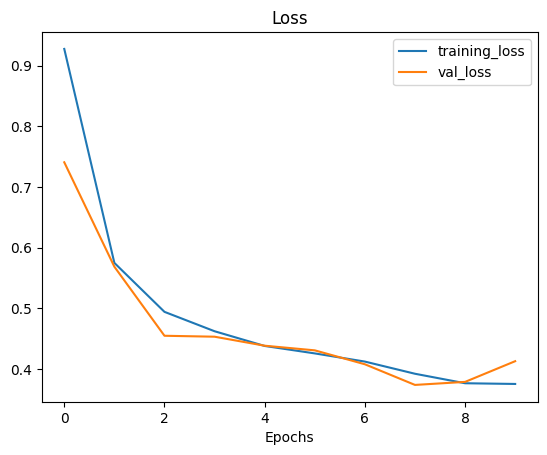

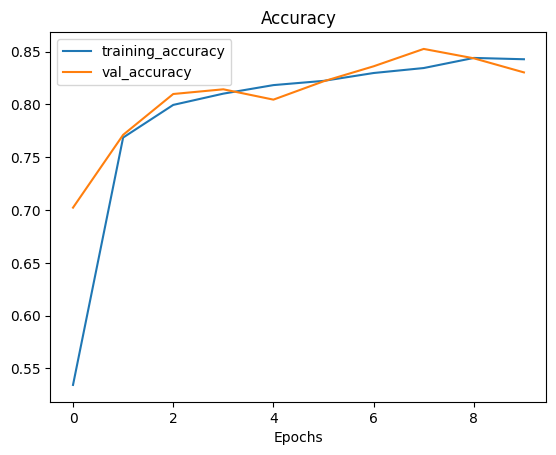

In [61]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
plot_loss_curves(history_1)

Пункт 3

In [52]:
df = pd.read_csv('ecommerceDataset.csv',header=None)
df.columns =['label','text']
df.head()

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [53]:
df.isnull().sum()

label    0
text     1
dtype: int64

In [54]:
df.dropna(inplace=True)

In [55]:
df.describe()

,label,text
count,50424,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [56]:
df['text'][0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal blis

In [57]:
df['label'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: label, dtype: int64

In [58]:
def rm_punc(text):
    clean_text = text.translate(str.maketrans("", "", string.punctuation))
    return  clean_text


df['text'] = df['text'].apply(lambda s: rm_punc(s))

In [59]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def rm_stopswords(text):
        words = text.split()
        filtered_words = [word for word in words if word.casefold() not in stop_words]
        return " ".join(filtered_words)

df['text'] = df['text'].apply(lambda s : rm_stopswords(s))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
df['text'][0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints 87 X 87 inch Set 4 Painting made synthetic frame uv textured print gives multi effects attracts towards special series paintings makes wall beautiful gives royal touch painting ready hang would proud possess unique painting niche apart use modern efficient printing technology prints inks precision epson roland hp printers innovative hd printing technique results durable spectacular looking prints highest last lifetime print solely topnotch 100 inks achieve brilliant true colours Due high level uv resistance prints retain beautiful colours many years Add colour style living space digitally printed painting pleasure eternal blissso bring home elegant print lushed rich colors makes nothing sheer elegance friends familyit would treasured forever whoever lucky recipient Liven place intriguing paintings high definition hd graphic digital prints home office room'

In [61]:
def rm_digit(text):
    return re.sub(r'\d+', '', text)
df['text'] = df['text'].apply(lambda d : rm_digit(d))

In [62]:
df['text'][0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints  X  inch Set  Painting made synthetic frame uv textured print gives multi effects attracts towards special series paintings makes wall beautiful gives royal touch painting ready hang would proud possess unique painting niche apart use modern efficient printing technology prints inks precision epson roland hp printers innovative hd printing technique results durable spectacular looking prints highest last lifetime print solely topnotch  inks achieve brilliant true colours Due high level uv resistance prints retain beautiful colours many years Add colour style living space digitally printed painting pleasure eternal blissso bring home elegant print lushed rich colors makes nothing sheer elegance friends familyit would treasured forever whoever lucky recipient Liven place intriguing paintings high definition hd graphic digital prints home office room'

In [63]:
stemmer = PorterStemmer()

def stemmer_text(text):
    words = nltk.word_tokenize(text)

    stemmed_words = [stemmer.stem(word) for word in words]

    return " ".join(stemmed_words)

df['text'] = df['text'].apply(lambda d : stemmer_text(d))

In [64]:
df['text'][0]

'paper plane design frame wall hang motiv offic decor art print x inch set paint made synthet frame uv textur print give multi effect attract toward special seri paint make wall beauti give royal touch paint readi hang would proud possess uniqu paint nich apart use modern effici print technolog print ink precis epson roland hp printer innov hd print techniqu result durabl spectacular look print highest last lifetim print sole topnotch ink achiev brilliant true colour due high level uv resist print retain beauti colour mani year add colour style live space digit print paint pleasur etern blissso bring home eleg print lush rich color make noth sheer eleg friend familyit would treasur forev whoever lucki recipi liven place intrigu paint high definit hd graphic digit print home offic room'

In [65]:
mapping ={}
for i , label in enumerate(set(df['label'])):
      mapping[label] = i

df['label'] = df['label'].map(mapping)

In [66]:
df.head()

,label,text
0,0,paper plane design frame wall hang motiv offic...
1,0,saf floral frame paint wood inch x inch specia...
2,0,saf uv textur modern art print frame paint syn...
3,0,saf flower print frame paint synthet inch x in...
4,0,incred gift india wooden happi birthday uniqu ...


In [67]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
oov_tok = '<OOV>'
training_portion = 0.8

In [68]:
train_size = int(len(df['text']) * training_portion)

train_articles = df['text'][0: train_size]
train_labels = df['label'][0: train_size]

validation_articles = df['text'][train_size:]
validation_labels = df['label'][train_size:]

In [69]:
print('train_articles' ,len(train_articles))
print('train_labels', len(train_labels))
print('validation_articles', len(validation_articles))
print('validation_labels', len(validation_labels))

train_articles 40339
train_labels 40339
validation_articles 10085
validation_labels 10085


In [70]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [71]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
len(train_sequences)

40339

In [72]:
train_padded = pad_sequences(train_sequences, maxlen=max_length,)

In [73]:
len(train_padded),len(train_padded[0])

(40339, 200)

In [74]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length)

In [75]:
df['label']

0        0
1        0
2        0
3        0
4        0
        ..
50420    3
50421    3
50422    3
50423    3
50424    3
Name: label, Length: 50424, dtype: int64

In [76]:
set(df['label'])

{0, 1, 2, 3}

In [77]:
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim ))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = embedding_dim))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          320000    
                                                                 
 dropout_2 (Dropout)         (None, None, 64)          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 328581 (1.25 MB)
Trainable params: 328581 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [79]:
num_epochs = 20
history = model.fit(train_padded, train_labels , epochs=num_epochs,
                    validation_data=(validation_padded, validation_labels),
                    verbose=2)

Epoch 1/20
1261/1261 - 81s - loss: 0.3808 - accuracy: 0.8753 - val_loss: 2.5450 - val_accuracy: 0.2188 - 81s/epoch - 64ms/step
Epoch 2/20
1261/1261 - 75s - loss: 0.1724 - accuracy: 0.9524 - val_loss: 3.4978 - val_accuracy: 0.2421 - 75s/epoch - 59ms/step
Epoch 3/20
1261/1261 - 76s - loss: 0.1097 - accuracy: 0.9713 - val_loss: 3.2044 - val_accuracy: 0.2656 - 76s/epoch - 60ms/step
Epoch 4/20
1261/1261 - 76s - loss: 0.1031 - accuracy: 0.9714 - val_loss: 4.3417 - val_accuracy: 0.1513 - 76s/epoch - 60ms/step
Epoch 5/20
1261/1261 - 77s - loss: 0.2121 - accuracy: 0.9324 - val_loss: 3.9638 - val_accuracy: 0.0827 - 77s/epoch - 61ms/step
Epoch 6/20
1261/1261 - 77s - loss: 0.1153 - accuracy: 0.9664 - val_loss: 3.2045 - val_accuracy: 0.2750 - 77s/epoch - 61ms/step
Epoch 7/20
1261/1261 - 75s - loss: 0.1366 - accuracy: 0.9557 - val_loss: 4.1314 - val_accuracy: 0.1931 - 75s/epoch - 60ms/step
Epoch 8/20
1261/1261 - 76s - loss: 0.0728 - accuracy: 0.9792 - val_loss: 4.5372 - val_accuracy: 0.2401 - 76s/ep

In [80]:
loss, accuracy = model.evaluate(validation_padded, validation_labels)
print('Test accuracy :', accuracy)

316/316 [==============================] - 4s 13ms/step - loss: 5.7530 - accuracy: 0.2148
Test accuracy : 0.21477441489696503
